In [32]:
# 1. Import Required Libraries
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [33]:
with_mask_path = '/kaggle/input/face-mask-dataset/data/with_mask'
without_mask_path = '/kaggle/input/face-mask-dataset/data/without_mask'


In [34]:
with_mask_files = os.listdir(with_mask_path)
without_mask_files = os.listdir(without_mask_path)

In [35]:
print("Sample with_mask files:", with_mask_files[:3])
print("Sample without_mask files:", without_mask_files[:3])
print("Total with_mask:", len(with_mask_files))
print("Total without_mask:", len(without_mask_files))

Sample with_mask files: ['with_mask_3326.jpg', 'with_mask_3139.jpg', 'with_mask_696.jpg']
Sample without_mask files: ['without_mask_3248.jpg', 'without_mask_2803.jpg', 'without_mask_650.jpg']
Total with_mask: 3725
Total without_mask: 3828


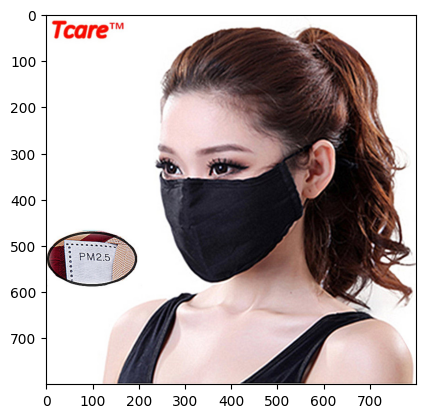

In [36]:
img=Image.open("/kaggle/input/face-mask-dataset/data/with_mask/with_mask_3326.jpg")
plt.imshow(img)

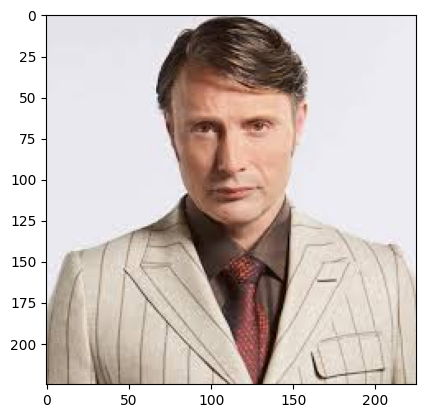

In [37]:
img=Image.open('/kaggle/input/face-mask-dataset/data/without_mask/without_mask_2803.jpg')
plt.imshow(img)

In [38]:
label_with_mask=[1]*3725
label_without_mask=[0]*3828

In [39]:
label=label_with_mask + label_without_mask

In [40]:
len(label)

7553

# Combining the Image file data

In [41]:
data = []

# Load with_mask images
for i in with_mask_files:
    file = os.path.join(with_mask_path, i)
    img = Image.open(file)
    img_resized = img.resize((128, 128))
    img_rgb = img_resized.convert('RGB')
    data.append(np.array(img_rgb))

# Load without_mask images
for i in without_mask_files:
    file = os.path.join(without_mask_path, i)
    img = Image.open(file)
    img_resized = img.resize((128, 128))
    img_rgb = img_resized.convert('RGB')
    data.append(np.array(img_rgb))


In [42]:
len(data)

7553

In [43]:
X=np.array(data)
Y=np.array(label)

In [44]:
print("X shape:", X.shape)
print("Y shape:", Y.shape)

X shape: (7553, 128, 128, 3)
Y shape: (7553,)


In [45]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [46]:
print(X_train.shape,X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [47]:
X_scaled_train=X_train/255
X_scaled_test=X_test/255


In [48]:
X_train[0]

array([[[ 28,  27,  23],
        [ 28,  27,  23],
        [ 28,  27,  23],
        ...,
        [ 43,  43,  35],
        [ 43,  43,  35],
        [ 43,  43,  35]],

       [[ 30,  29,  25],
        [ 30,  29,  25],
        [ 30,  29,  25],
        ...,
        [ 43,  43,  35],
        [ 43,  43,  35],
        [ 43,  43,  35]],

       [[ 29,  28,  24],
        [ 29,  28,  24],
        [ 29,  28,  24],
        ...,
        [ 44,  44,  36],
        [ 44,  44,  36],
        [ 44,  44,  36]],

       ...,

       [[ 73,  41,  14],
        [ 70,  40,  15],
        [ 61,  35,  16],
        ...,
        [194, 189, 185],
        [193, 188, 184],
        [192, 187, 183]],

       [[ 79,  51,  27],
        [ 72,  44,  21],
        [ 61,  35,  17],
        ...,
        [193, 189, 185],
        [192, 188, 184],
        [192, 187, 183]],

       [[107,  91,  80],
        [ 87,  65,  51],
        [ 63,  39,  24],
        ...,
        [191, 188, 183],
        [190, 187, 182],
        [190, 187, 182]]

In [49]:
X_scaled_train[0]

array([[[0.10980392, 0.10588235, 0.09019608],
        [0.10980392, 0.10588235, 0.09019608],
        [0.10980392, 0.10588235, 0.09019608],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ]],

       [[0.11764706, 0.11372549, 0.09803922],
        [0.11764706, 0.11372549, 0.09803922],
        [0.11764706, 0.11372549, 0.09803922],
        ...,
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ],
        [0.16862745, 0.16862745, 0.1372549 ]],

       [[0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        [0.11372549, 0.10980392, 0.09411765],
        ...,
        [0.17254902, 0.17254902, 0.14117647],
        [0.17254902, 0.17254902, 0.14117647],
        [0.17254902, 0.17254902, 0.14117647]],

       ...,

       [[0.28627451, 0.16078431, 0.05490196],
        [0.2745098 , 0.15686275, 0.05882353],
        [0.23921569, 0

In [50]:
model = keras.Sequential([
    keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(128, 128, 3)),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Conv2D(64, (3,3), activation='relu'),
    keras.layers.MaxPooling2D(2,2),

    keras.layers.Flatten(),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(2, activation='softmax')  # Use softmax for 2-class classification
])


In [51]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [52]:
history = model.fit(X_scaled_train, Y_train, validation_split=0.1, epochs=20)

Epoch 1/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 9s 31ms/step - accuracy: 0.6664 - loss: 0.7110 - val_accuracy: 0.8843 - val_loss: 0.2645
Epoch 2/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8680 - loss: 0.3235 - val_accuracy: 0.8975 - val_loss: 0.2391
Epoch 3/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.8927 - loss: 0.2545 - val_accuracy: 0.9223 - val_loss: 0.1959
Epoch 4/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9173 - loss: 0.2128 - val_accuracy: 0.9207 - val_loss: 0.1839
Epoch 5/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9372 - loss: 0.1792 - val_accuracy: 0.9140 - val_loss: 0.1929
Epoch 6/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9460 - loss: 0.1393 - val_accuracy: 0.9339 - val_loss: 0.1716
Epoch 7/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - accuracy: 0.9519 - loss: 0.1420 - val_accuracy: 0.9240 - val_loss: 0.1861
Epoch 8/20
170/170 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9553 - loss: 0.1066 - val_accu

In [54]:
# 11. Evaluate Model
loss, accuracy = model.evaluate(X_scaled_test, Y_test)
print("Test Accuracy:", accuracy)

48/48 ━━━━━━━━━━━━━━━━━━━━ 1s 21ms/step - accuracy: 0.9401 - loss: 0.3583
Test Accuracy: 0.9377895593643188


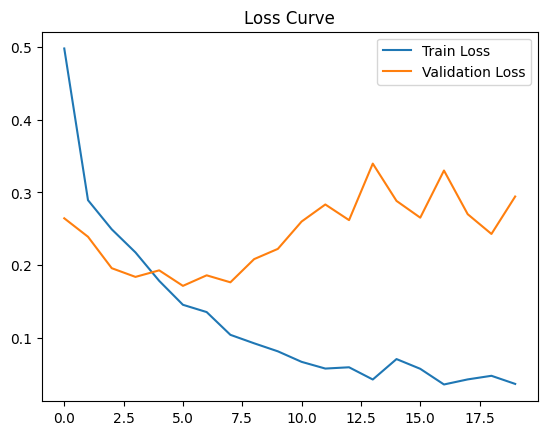

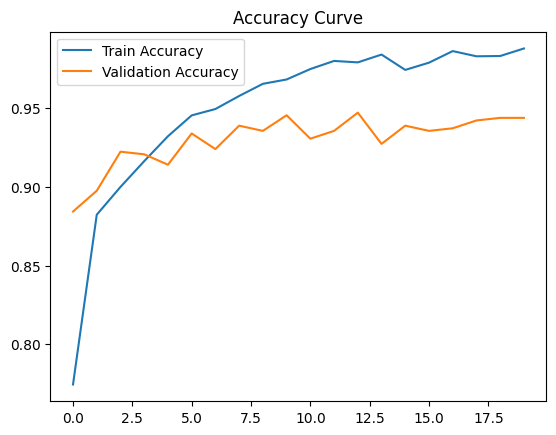

In [55]:
# 12. Plot Loss and Accuracy
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title("Loss Curve")
plt.legend()
plt.show()

plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title("Accuracy Curve")
plt.legend()
plt.show()

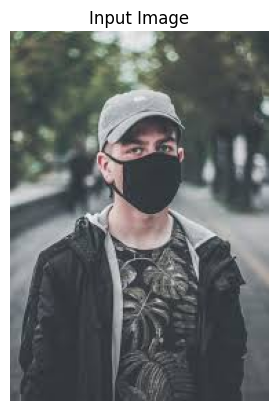

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 763ms/step
😷 The person in the image is **wearing a mask**.


In [58]:
sample_image_path = '/kaggle/input/mask-image/mask.jpg'  # update this

# Load and preprocess image
input_image = cv2.imread(sample_image_path)
plt.imshow(cv2.cvtColor(input_image, cv2.COLOR_BGR2RGB))
plt.title("Input Image")
plt.axis('off')
plt.show()

input_resized = cv2.resize(input_image, (128,128))
input_scaled = input_resized / 255.0
input_reshaped = np.reshape(input_scaled, (1, 128, 128, 3))

# Make prediction
prediction = model.predict(input_reshaped)
predicted_label = np.argmax(prediction)

# Show result
if predicted_label == 1:
    print("😷 The person in the image is **wearing a mask**.")
else:
    print("😷 The person in the image is **not wearing a mask**.")

# 14. (Optional) Save model
# model.save('face_mask_model.h5')

In [59]:
# Save model to a file
model.save('face_mask_model.h5')


In [60]:
from IPython.display import FileLink



# Create a download link
FileLink('face_mask_model.h5')


/kaggle/working/face_mask_model.h5